In [2]:
#Assignment No: 5
#Title: Implement the Continuous Bag of Words(CBOW) Model.
#Stages can be: a. Data preparation b. Generate training data c. Train model d. Output
#Name: Esha Vijay Yadav
#RollNo: 4050

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np

In [3]:
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
pip install gensim

In [5]:
pip install --upgrade gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   -- ------------------------------------- 1.4/24.0 MB 17.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.9/24.0 MB 14.8 MB/s eta 0:00:02
   --- ------------------------------------ 2.1/24.0 MB 11.0 MB/s eta 0:00:02
   ---- ----------------------------------- 2.6/24.0 MB 10.2 MB/s eta 0:00:03
   ---- ----------------------------------- 3.0/24.0 MB 10.0 MB/s eta 0:00:03
   ----- ---------------------------------- 3.3/24.0 MB 9.2 MB/s eta 0:00:03
   ------ --------------------------------- 3.7/24.0 MB 9.1 MB/s eta 0:00:03
   ------ --------------------------------- 4.1/24.0 MB 8.1 MB/s eta 0:00:03
   ------- -------------------------------- 4.3/24.0 MB 7.8 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/24.0 MB 7.3 MB/s eta 0:00:03
   ------- -------------------------------- 4.6/24.0 MB 7.0 MB/s eta 0:00:03
   ------- -------------------------------- 4.8/24.0 MB 6.6 MB/s eta 0:00:03
 

In [6]:
import gensim
from gensim.models import Word2Vec

In [7]:
import re
import bs4 as bs
import urllib.request

In [8]:
scrapped_data=urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article=scrapped_data.read()
                                     
paresed_article=bs.BeautifulSoup(article, 'lxml')

paragraphs = paresed_article.find_all('p')

article_text=""
for p in paragraphs:
    article_text+=p.text
    sentences=article_text
print(article_text)

Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] Advances in the field of deep learning have allowed neural networks to surpass many previous approaches in performance.[2]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning.[6][7]
From a theoretical viewpoint, probably approximately correct (PAC) learning provides a framework for describing machine learning.
The term machine l

In [11]:
sentences="""Alice 23 opened the door and found that it led into a small 90
passage, not much larger than a rat-hole: she knelt down and 
looked along the passage into the loveliest garden you ever saw. 
How she longed to get out of that dark hall, and wander about 
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; and even if
my head would go through, (thought) Spoor Alice, it would be of
very little use without my shoulders. Oh, how I wish
I could shut up like a telescope! I think I could, if I only
know how to begin. For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few 
things indeed were really impossible.
""" 
sentences = re.sub('[^A-Za-z0-9]+',' ', sentences)

sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

print(sentences)

Alice 23 opened the door and found that it led into small 90 passage not much larger than rat hole she knelt down and looked along the passage into the loveliest garden you ever saw How she longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go through thought Spoor Alice it would be of very little use without my shoulders Oh how wish could shut up like telescope think could if only know how to begin For you see so many out of the way things had happened lately that Alice had begun to think that very few things indeed were really impossible


In [20]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')
#nltk.download('punkt')

sentences = re.sub('[^A-Za-z]+', ' ', sentences)

sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip() 

sentences = sentences.lower()

all_sent = nltk.sent_tokenize(sentences)

all_words=[nltk.word_tokenize(sent) for sent in all_sent]


for i in range(len(all_words)):
    all_words[i]=[w for w in all_words[i] if w not in 
stopwords.words('english')]

data = all_words

data1 = data[0]

print(data)

[['alice', 'opened', 'door', 'found', 'led', 'small', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw', 'longed', 'get', 'dark', 'hall', 'wander', 'among', 'beds', 'bright', 'flowers', 'cool', 'fountains', 'could', 'even', 'get', 'head', 'doorway', 'even', 'head', 'would', 'go', 'thought', 'spoor', 'alice', 'would', 'little', 'use', 'without', 'shoulders', 'oh', 'wish', 'could', 'shut', 'like', 'telescope', 'think', 'could', 'know', 'begin', 'see', 'many', 'way', 'things', 'happened', 'lately', 'alice', 'begun', 'think', 'things', 'indeed', 'really', 'impossible']]


In [21]:
model1= gensim.models.Word2Vec(data, min_count = 1, vector_size = 52, window= 5)

In [22]:
vocabulary = model1.wv.key_to_index["door"]
print(vocabulary)
vocabulary = model1.wv.key_to_index
print(vocabulary)

30
{'could': 0, 'alice': 1, 'passage': 2, 'think': 3, 'things': 4, 'even': 5, 'head': 6, 'get': 7, 'would': 8, 'ever': 9, 'saw': 10, 'longed': 11, 'indeed': 12, 'dark': 13, 'loveliest': 14, 'hall': 15, 'wander': 16, 'among': 17, 'garden': 18, 'looked': 19, 'along': 20, 'bright': 21, 'knelt': 22, 'hole': 23, 'rat': 24, 'larger': 25, 'much': 26, 'small': 27, 'led': 28, 'found': 29, 'door': 30, 'opened': 31, 'beds': 32, 'fountains': 33, 'flowers': 34, 'wish': 35, 'lately': 36, 'happened': 37, 'way': 38, 'many': 39, 'see': 40, 'begin': 41, 'know': 42, 'telescope': 43, 'like': 44, 'shut': 45, 'oh': 46, 'cool': 47, 'shoulders': 48, 'without': 49, 'use': 50, 'little': 51, 'spoor': 52, 'thought': 53, 'go': 54, 'doorway': 55, 'really': 56, 'begun': 57, 'impossible': 58}


In [23]:
wrd='door'
v1=model1.wv[wrd]
similar_words=model1.wv.most_similar(wrd)

for x in similar_words:
    print(x)

('beds', 0.36491504311561584)
('much', 0.3305249512195587)
('shut', 0.32979297637939453)
('cool', 0.25908932089805603)
('wish', 0.243193581700325)
('oh', 0.24176433682441711)
('begun', 0.2212926298379898)
('begin', 0.17681987583637238)
('loveliest', 0.14279094338417053)
('things', 0.13509944081306458)


In [26]:
dat= []
print(len(data1))

for i in range(2, len(data1) - 2):
    print(i)
    context = [data1[i - 2], data1[i - 1], data1[i+1], data1[i + 2]]
    target = data1[i]
    print(context, target)
    dat.append((context, target))
    print(dat)
print(dat[:5])

70
2
['alice', 'opened', 'found', 'led'] door
[(['alice', 'opened', 'found', 'led'], 'door')]
3
['opened', 'door', 'led', 'small'] found
[(['alice', 'opened', 'found', 'led'], 'door'), (['opened', 'door', 'led', 'small'], 'found')]
4
['door', 'found', 'small', 'passage'] led
[(['alice', 'opened', 'found', 'led'], 'door'), (['opened', 'door', 'led', 'small'], 'found'), (['door', 'found', 'small', 'passage'], 'led')]
5
['found', 'led', 'passage', 'much'] small
[(['alice', 'opened', 'found', 'led'], 'door'), (['opened', 'door', 'led', 'small'], 'found'), (['door', 'found', 'small', 'passage'], 'led'), (['found', 'led', 'passage', 'much'], 'small')]
6
['led', 'small', 'much', 'larger'] passage
[(['alice', 'opened', 'found', 'led'], 'door'), (['opened', 'door', 'led', 'small'], 'found'), (['door', 'found', 'small', 'passage'], 'led'), (['found', 'led', 'passage', 'much'], 'small'), (['led', 'small', 'much', 'larger'], 'passage')]
7
['small', 'passage', 'larger', 'rat'] much
[(['alice', 'ope

In [27]:
[]
i=3
print(dat[i][0],dat[i][1])

print(model1.predict_output_word(dat[i][0]))

['found', 'led', 'passage', 'much'] small
[('cool', 0.016949423), ('knelt', 0.01694938), ('lately', 0.016949348), ('oh', 0.016949333), ('get', 0.016949303), ('even', 0.016949302), ('opened', 0.016949298), ('led', 0.016949268), ('begun', 0.016949266), ('looked', 0.016949262)]


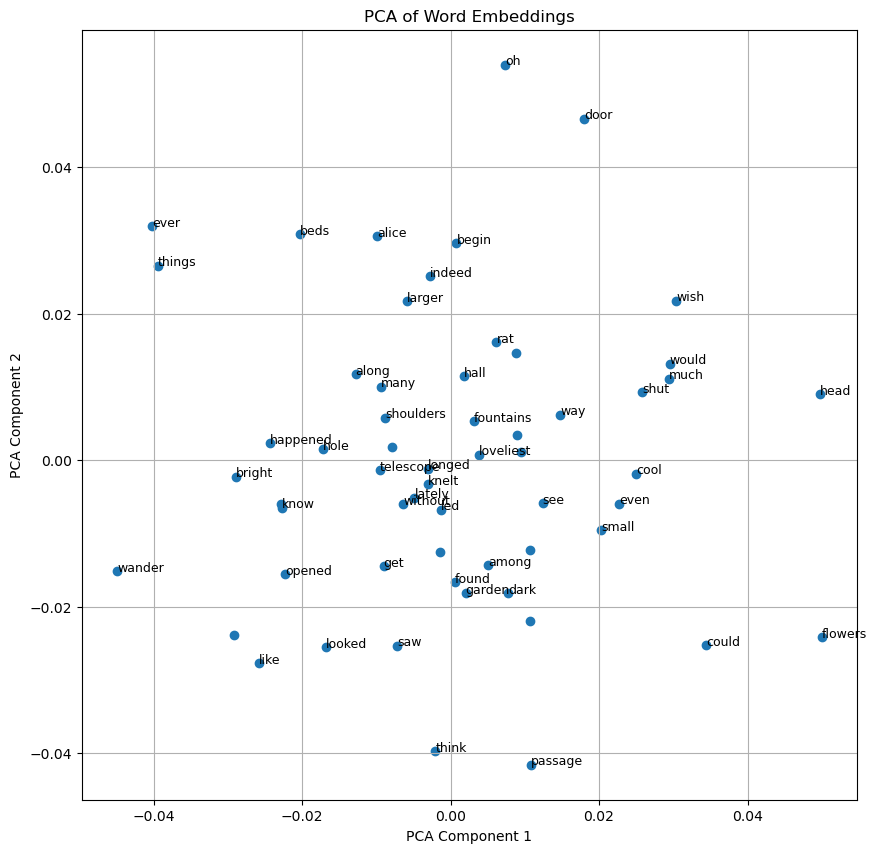

In [28]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
 
X = model1.wv[model1.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

words = list(model1.wv.key_to_index)
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=9)


plt.title('PCA of Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()